<a href="https://colab.research.google.com/github/NIKKISAHA/dataSet/blob/main/worldpopulationDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
df = pd.read_csv("/content/drive/MyDrive/world-data-2023.csv")
df.head()

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887


In [21]:
df.shape
df.columns

Index(['Country', 'Density\n(P/Km2)', 'Abbreviation', 'Agricultural Land( %)',
       'Land Area(Km2)', 'Armed Forces size', 'Birth Rate', 'Calling Code',
       'Capital/Major City', 'Co2-Emissions', 'CPI', 'CPI Change (%)',
       'Currency-Code', 'Fertility Rate', 'Forested Area (%)',
       'Gasoline Price', 'GDP', 'Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)', 'Infant mortality',
       'Largest city', 'Life expectancy', 'Maternal mortality ratio',
       'Minimum wage', 'Official language', 'Out of pocket health expenditure',
       'Physicians per thousand', 'Population',
       'Population: Labor force participation (%)', 'Tax revenue (%)',
       'Total tax rate', 'Unemployment rate', 'Urban_population', 'Latitude',
       'Longitude'],
      dtype='object')

In [22]:
df=df[['Country','Birth Rate','Fertility Rate','Infant mortality','Life expectancy', 'Population']]
df.head()
# df.info()

,Country,Birth Rate,Fertility Rate,Infant mortality,Life expectancy,Population
0,Afghanistan,32.49,4.47,47.9,64.5,"38,041,754"
1,Albania,11.78,1.62,7.8,78.5,"2,854,191"
2,Algeria,24.28,3.02,20.1,76.7,"43,053,054"
3,Andorra,7.20,1.27,2.7,NaN,"77,142"
4,Angola,40.73,5.52,51.6,60.8,"31,825,295"


In [23]:
df['Population']=df['Population'].astype(str).str.replace(',','')
df['Population']=pd.to_numeric(df['Population'],errors='coerce')
# df.info()
missing=['Country','Birth Rate','Fertility Rate','Infant mortality','Life expectancy', 'Population']
median_values=df[missing].median(numeric_only=True)
df[missing]=df[missing].fillna(median_values)

In [24]:
df.rename(columns={'Birth Rate':'Birth_Rate'},inplace=True)
df.rename(columns={'Fertility Rate':'Fertility_Rate'},inplace=True)
df.rename(columns={'Infant mortality':'Infant_mortality'},inplace=True)
df.rename(columns={'Life expectancy':'Life_expectancy'},inplace=True)
df.columns

Index(['Country', 'Birth_Rate', 'Fertility_Rate', 'Infant_mortality',
       'Life_expectancy', 'Population'],
      dtype='object')

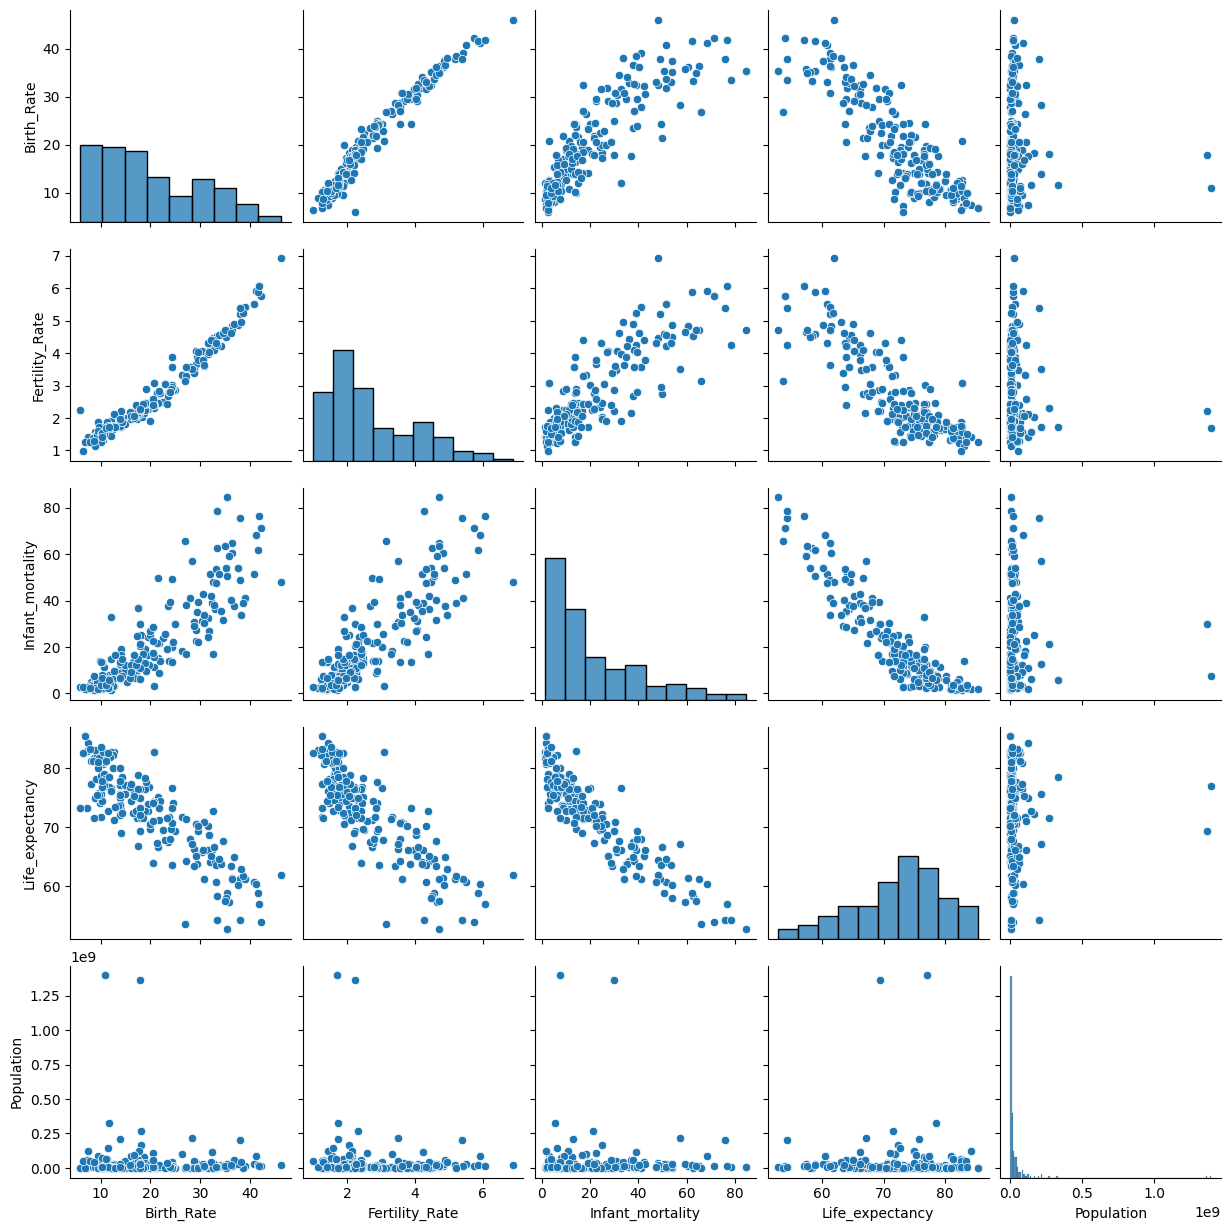

In [25]:
sns.pairplot(df)

<ipython-input-26-d5b6ad87e787>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  co=df.corr()


Text(0.5, 1.0, 'cm')

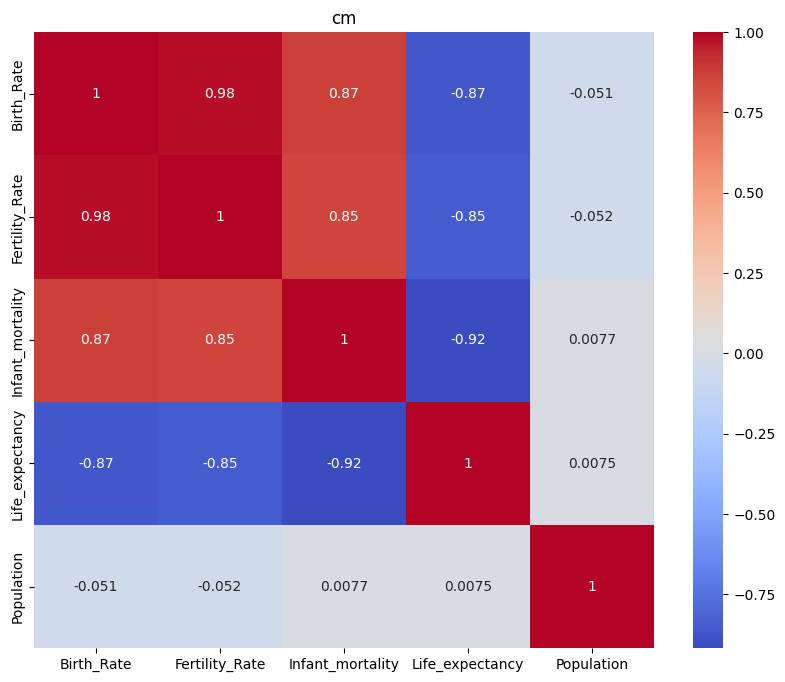

In [26]:
co=df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(co,annot=True,cmap='coolwarm')
plt.title('cm')

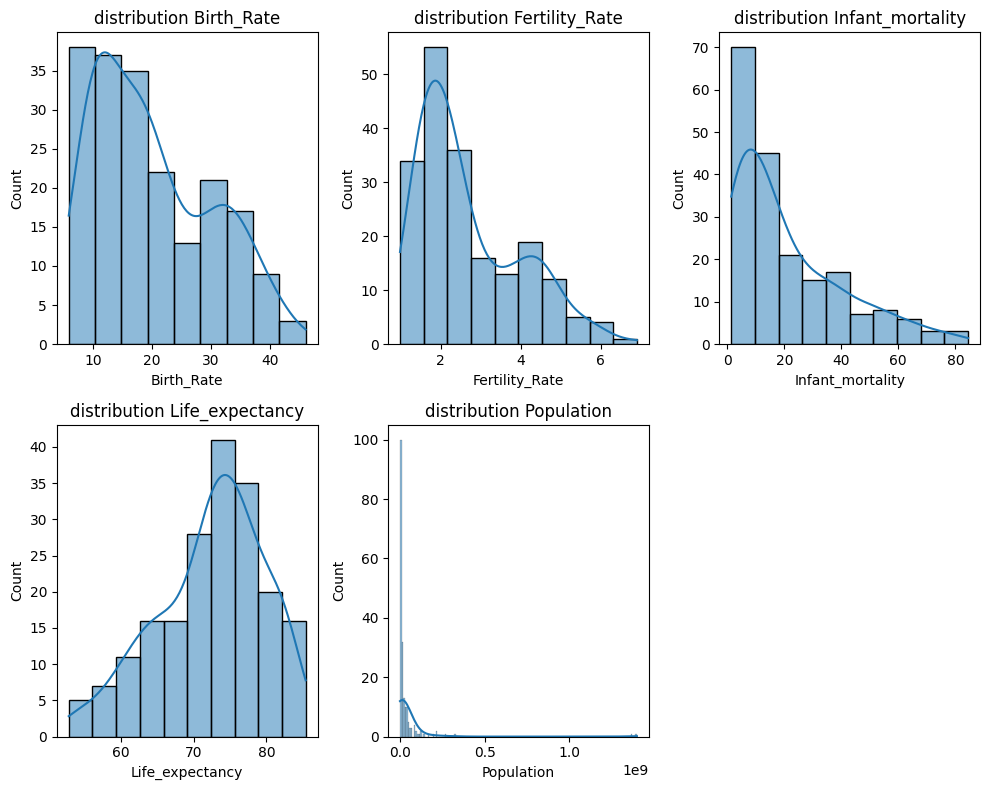

In [31]:
plt.figure(figsize=(10,8))
for col in df.columns[1:]:
  plt.subplot(2,3,df.columns.get_loc(col))
  sns.histplot(df[col],kde=True)
  plt.title(f'distribution {col}')
plt.tight_layout()

Text(0.5, 1.0, 'Birth_Rate vs Fertility_Rate')

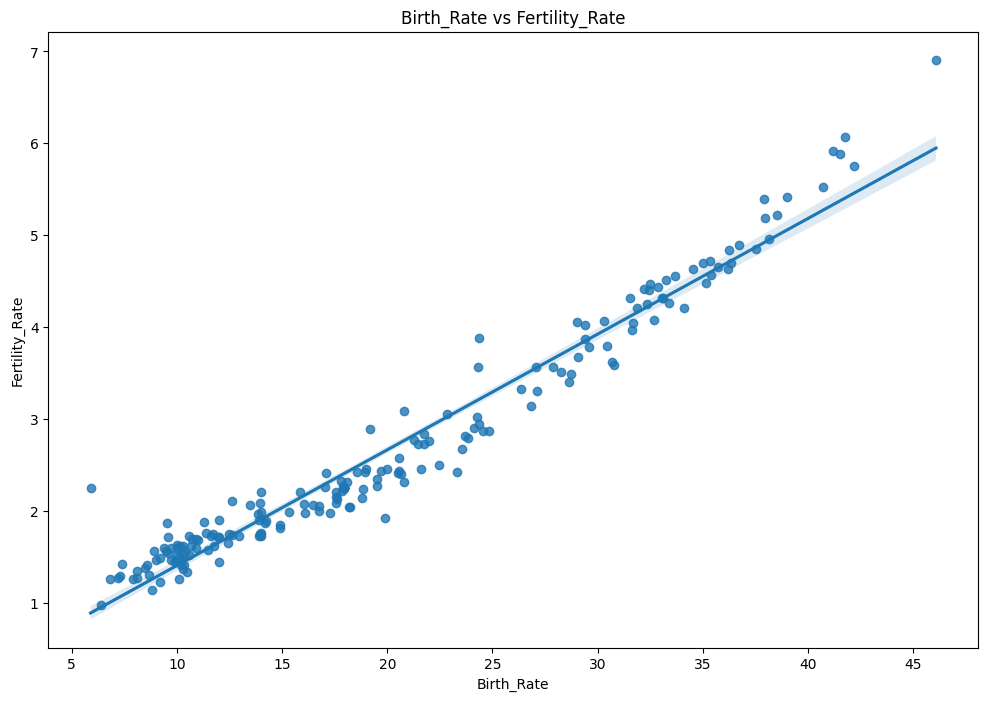

In [35]:
plt.figure(figsize=(12,8))
sns.regplot(data=df,x="Birth_Rate",y="Fertility_Rate")
plt.title("Birth_Rate vs Fertility_Rate")

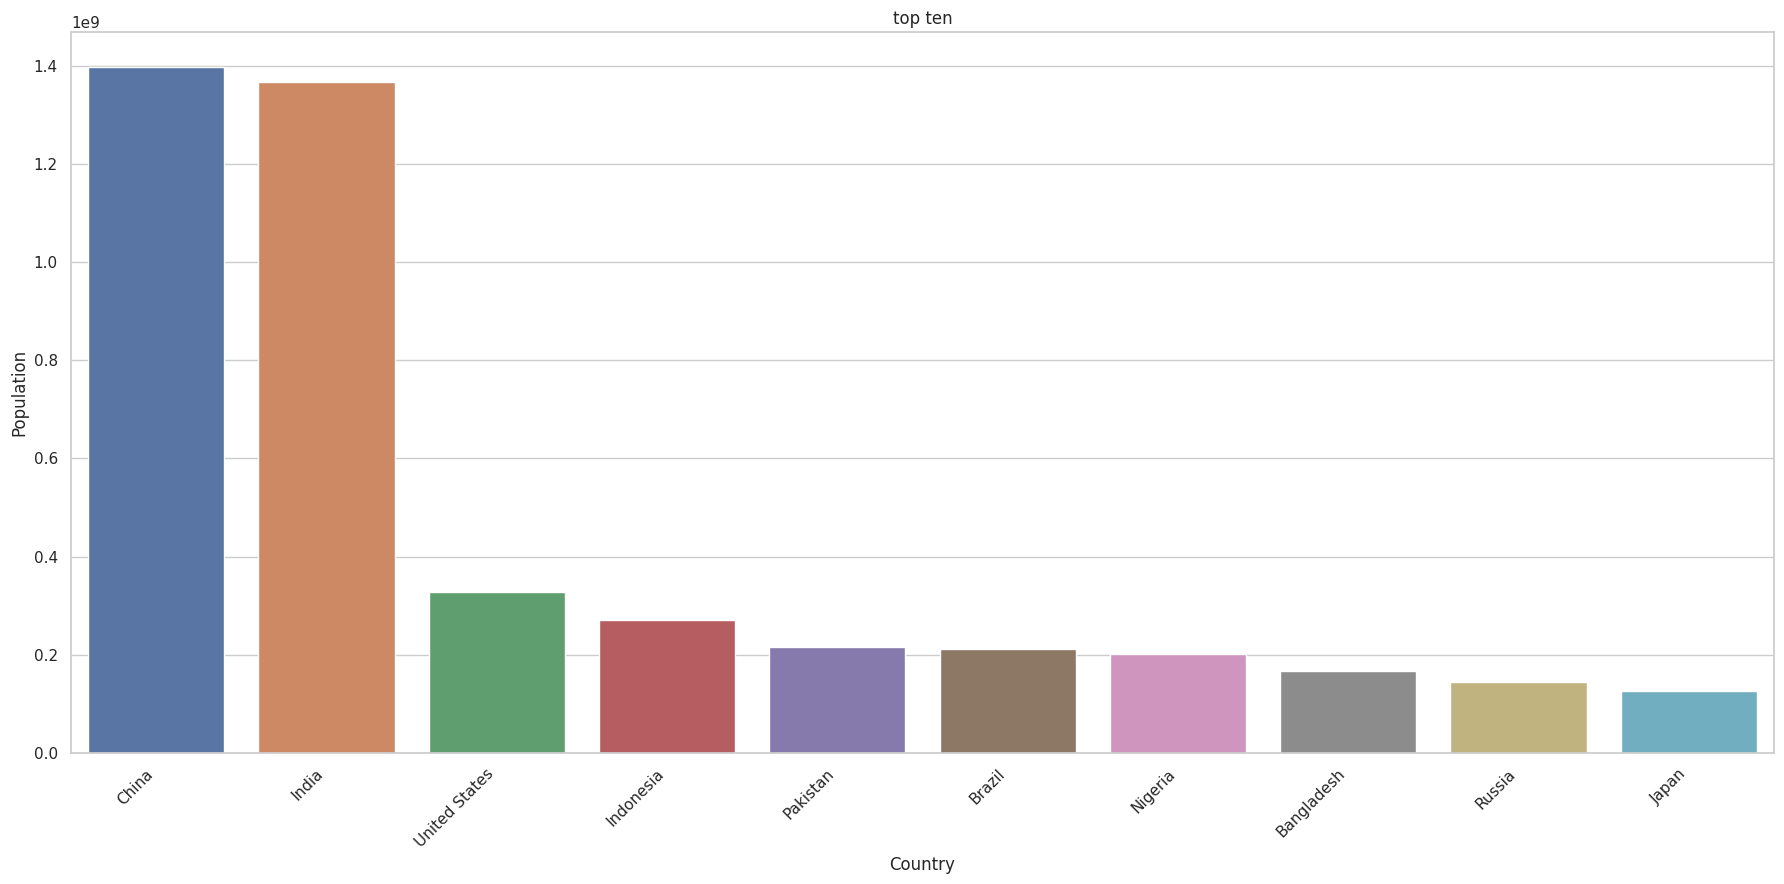

In [37]:
top_ten=df.nlargest(10, 'Population')
sns.set(style="whitegrid")
plt.figure(figsize=(18,9))
ax = sns.barplot(x='Country',y='Population',data=top_ten)
ax.set_title("top ten")
ax.set_xlabel('Country')
ax.set_ylabel('Population')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()

In [38]:
df.columns

Index(['Country', 'Birth_Rate', 'Fertility_Rate', 'Infant_mortality',
       'Life_expectancy', 'Population'],
      dtype='object')

In [39]:
avg_fertility_by_country=df.groupby('Country')['Fertility_Rate'].mean()
print(avg_fertility_by_country)

Country
Afghanistan    4.47
Albania        1.62
Algeria        3.02
Andorra        1.27
Angola         5.52
               ... 
Venezuela      2.27
Vietnam        2.05
Yemen          3.79
Zambia         4.63
Zimbabwe       3.62
Name: Fertility_Rate, Length: 195, dtype: float64


Country
San Marino       85.4
Japan            84.2
Switzerland      83.6
Spain            83.3
Singapore        83.1
Liechtenstein    83.0
Italy            82.9
Israel           82.8
Norway           82.8
Australia        82.7
Name: Life_expectancy, dtype: float64


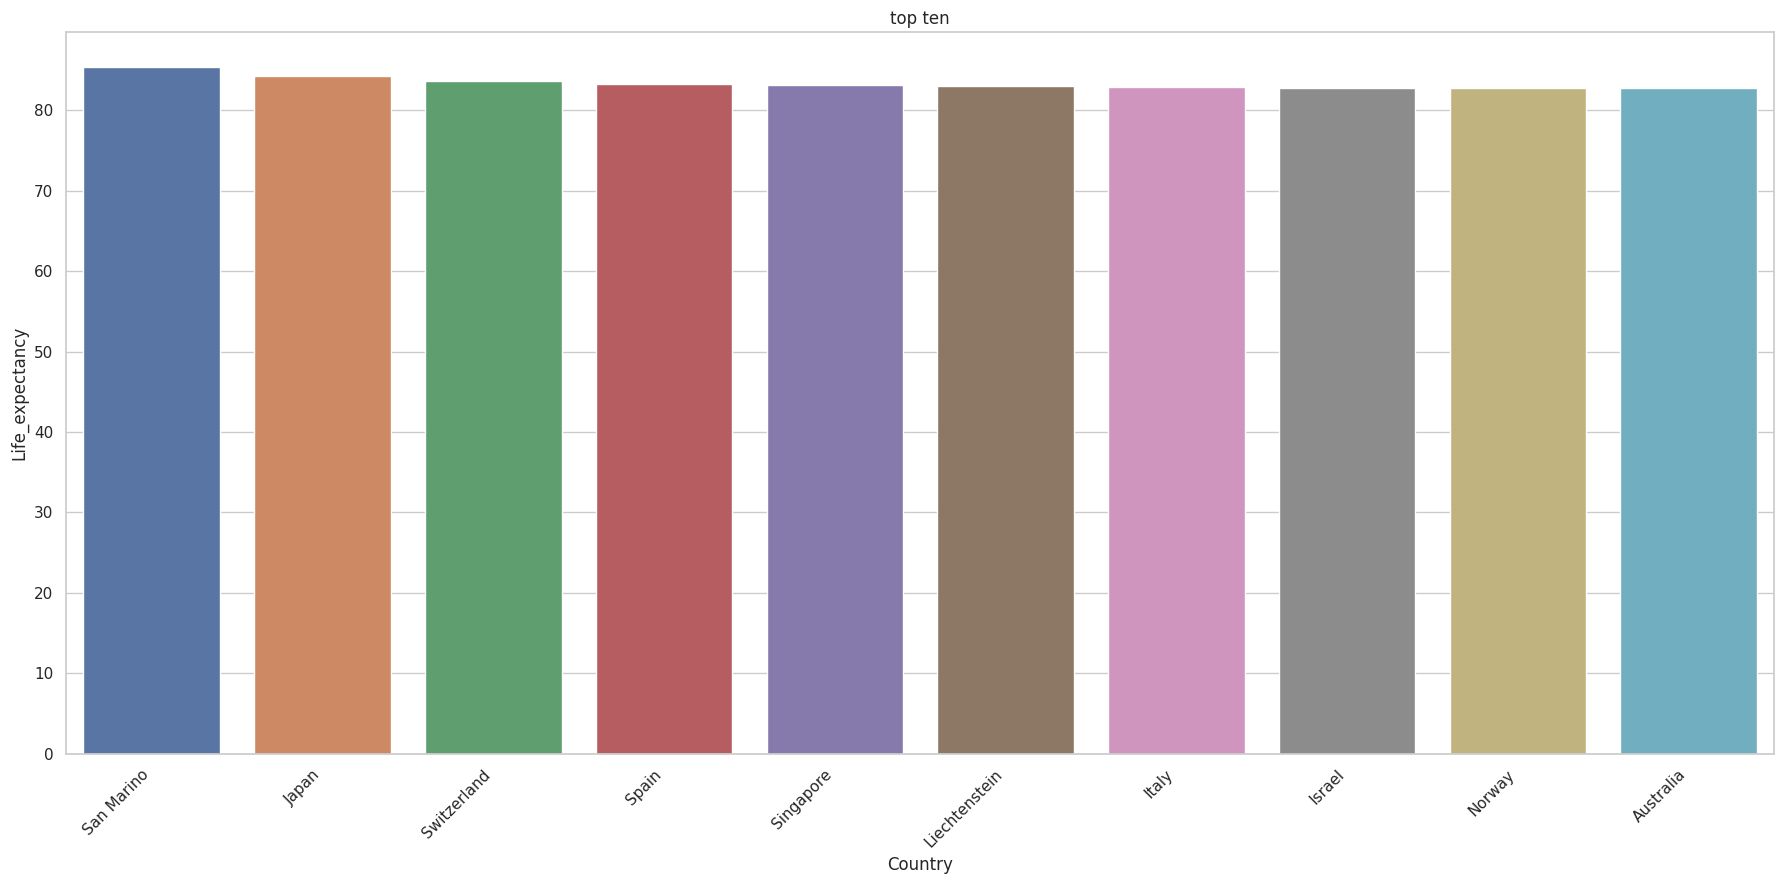

In [51]:
avg_Life_expectancy_by_country=df.groupby('Country')['Life_expectancy'].max().nlargest(10)
print(avg_Life_expectancy_by_country)

top_ten=df.nlargest(10, 'Life_expectancy')
sns.set(style="whitegrid")
plt.figure(figsize=(18,9))
ax = sns.barplot(x='Country',y='Life_expectancy',data=top_ten)
ax.set_title("top ten")
ax.set_xlabel('Country')
ax.set_ylabel('Life_expectancy')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()

In [59]:
avg_Life_expectancy_by_country=df.groupby('Country')['Life_expectancy'].max().nsmallest(10)
print(avg_Life_expectancy_by_country)

Country
Central African Republic    52.8
Lesotho                     53.7
Chad                        54.0
Nigeria                     54.3
Sierra Leone                54.3
Somalia                     57.1
Ivory Coast                 57.4
South Sudan                 57.6
Guinea-Bissau               58.0
Equatorial Guinea           58.4
Name: Life_expectancy, dtype: float64


In [63]:
birth_comparison_to_fertility=df[['Country','Birth_Rate','Fertility_Rate']]
print(birth_comparison_to_fertility.head())

       Country  Birth_Rate  Fertility_Rate
0  Afghanistan       32.49            4.47
1      Albania       11.78            1.62
2      Algeria       24.28            3.02
3      Andorra        7.20            1.27
4       Angola       40.73            5.52


In [67]:
birth_comparison_to=df[['Country', 'Infant_mortality',
       'Life_expectancy', 'Population']]
print(birth_comparison_to.head())

       Country  Infant_mortality  Life_expectancy  Population
0  Afghanistan              47.9             64.5  38041754.0
1      Albania               7.8             78.5   2854191.0
2      Algeria              20.1             76.7  43053054.0
3      Andorra               2.7             73.2     77142.0
4       Angola              51.6             60.8  31825295.0
